# An Empirical Linguistic Analysis of Clitics in Kurdish
This notebook provides analyses of clitics in Kurdish. It focuses on pronominal clitics and the emphatic/focal clitic *=îş*. 

The work is described in more detail in the paper entitled ["A Corpus-based Study of Endoclitic =îş in Kurdish"](https://sinaahmadi.github.io/docs/articles/ahmadi2023sle.pdf).

Last updated on August 21 by Sina Ahmadi (ahmadi.sina@outlook.com)

In [1]:
%matplotlib notebook
from ipywidgets import *
import json
import random
import numpy as np
import re
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
from matplotlib.ticker import ScalarFormatter
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
sns.set(font="Times New Roman")
from collections import Counter
plt.rcParams["font.family"] = "Times New Roman"

from conllu import parse_incr, parse

# A: Analysis of the clitics based on finite-state transducers

In [2]:
with open("resources/dar.txt", "r") as f:
    nouns = f.read().splitlines()[2:]

with open("resources/ciwan.txt", "r") as f:
    adjs = f.read().splitlines()[2:]

with open("resources/girtin.txt", "r") as f:
    tra = f.read().splitlines()[2:]

with open("resources/kewtin.txt", "r") as f:
    intra = f.read().splitlines()[2:]
    
data = {"noun": {i.split("\t")[-1]: i.split("\t")[1] for i in nouns}, \
        "adjective": {i.split("\t")[-1]: i.split("\t")[1] for i in adjs}, \
        "transitive": {i.split("\t")[-1]: i.split("\t")[1] for i in tra}, \
        "intransitive": {i.split("\t")[-1]: i.split("\t")[1] for i in intra}}
verb_stems = {"transitive": {"present": "gir", "past": "girt"}, "intransitive": {"present": "kew", "past": "kewt"}}
bases = {"noun": "dar", "adjective": "ciwan", "transitive": "girtin", "intransitive": "kewtin"}

In [3]:
def succeeds_stem(morph, form, stem):
    # Check if a morpheme appears as a suffix/enclitic in the given form
    if "-" + morph in form and form.split("-").index(morph) > form.split("-").index(stem):
        return True
    return False
    
def precedes_stem(morph, form, stem):
    # Check if a morpheme appears as a prefix/proclitic in the given form
    if "-" + morph in form and form.split("-").index(morph) < form.split("-").index(stem):
        return True
    return False

In [4]:
stats = {
    "noun": {
        "all": len(data["noun"]),
        "all_ish": 0,
        "pre": 0,
        "post": 0
    },
    "adjective": {
        "all": len(data["adjective"]),
        "all_ish": 0,
        "pre": 0,
        "post": 0
    },
    "transitive": {
        "all": len(data["transitive"]),
        "present": {
            "all_ish": 0,
            "pre": 0,
            "post": 0
        },
        "past": {
            "all_ish": 0,
            "pre": 0,
            "post": 0
        }
    },
    "intransitive": {
        "all": len(data["intransitive"]),
        "present": {
            "all_ish": 0,
            "pre": 0,
            "post": 0
        },
        "past": {
            "all_ish": 0,
            "pre": 0,
            "post": 0
        }
    }
}

In [5]:
morpheme, target_tag = "îş", "[ÎŞ]"
allomorph = ["ş", "yş"]

for i in data:
    if i == "noun" or i == "adjective":
        for j in data[i]:
            stem = bases[i]
            if target_tag in j:
                stats[i]["all_ish"] += 1            
                if succeeds_stem(morpheme, data[i][j], stem) or \
                    succeeds_stem(allomorph[0], data[i][j], stem) or \
                    succeeds_stem(allomorph[1], data[i][j], stem):
                    stats[i]["post"] += 1
                if precedes_stem(morpheme, data[i][j], stem) or \
                    precedes_stem(allomorph[0], data[i][j], stem) or \
                    precedes_stem(allomorph[1], data[i][j], stem):
                    stats[i]["pre"] += 1
    else:
        for j in data[i]:
            if target_tag in j:
                if verb_stems[i]["past"] in data[i][j]:
                    stats[i]["past"]["all_ish"] += 1
                    if precedes_stem(morpheme, data[i][j], verb_stems[i]["past"]) or \
                        precedes_stem(allomorph[0], data[i][j], verb_stems[i]["past"]) or \
                        precedes_stem(allomorph[1], data[i][j], verb_stems[i]["past"]):
                        stats[i]["past"]["pre"] += 1
                    if succeeds_stem(morpheme, data[i][j], verb_stems[i]["past"]) or \
                        succeeds_stem(allomorph[0], data[i][j], verb_stems[i]["past"]) or \
                        succeeds_stem(allomorph[1], data[i][j], verb_stems[i]["past"]):
                        stats[i]["past"]["post"] += 1
                elif verb_stems[i]["present"] in data[i][j]:
                    stats[i]["present"]["all_ish"] += 1
                    if precedes_stem(morpheme, data[i][j], verb_stems[i]["present"]) or \
                        precedes_stem(allomorph[0], data[i][j], verb_stems[i]["present"]) or \
                        precedes_stem(allomorph[1], data[i][j], verb_stems[i]["present"]):
                        stats[i]["present"]["pre"] += 1
                    if succeeds_stem(morpheme, data[i][j], verb_stems[i]["present"]) or \
                        succeeds_stem(allomorph[0], data[i][j], verb_stems[i]["present"]) or \
                        succeeds_stem(allomorph[1], data[i][j], verb_stems[i]["present"]):
                        stats[i]["present"]["post"] += 1

In [20]:
print(json.dumps(stats,
    indent=4,
    separators=(',', ': ')))

{
    "noun": {
        "all": 3032,
        "all_ish": 1512,
        "pre": 0,
        "post": 1512
    },
    "adjective": {
        "all": 9096,
        "all_ish": 4536,
        "pre": 0,
        "post": 4536
    },
    "transitive": {
        "all": 3180,
        "present": {
            "all_ish": 468,
            "pre": 468,
            "post": 0
        },
        "past": {
            "all_ish": 1122,
            "pre": 612,
            "post": 510
        }
    },
    "intransitive": {
        "all": 636,
        "present": {
            "all_ish": 84,
            "pre": 84,
            "post": 0
        },
        "past": {
            "all_ish": 234,
            "pre": 126,
            "post": 108
        }
    }
}


## A1: Where does the *=îş* clitic appear in nouns wrt the stem based on FSTs?

<IPython.core.display.Javascript object>


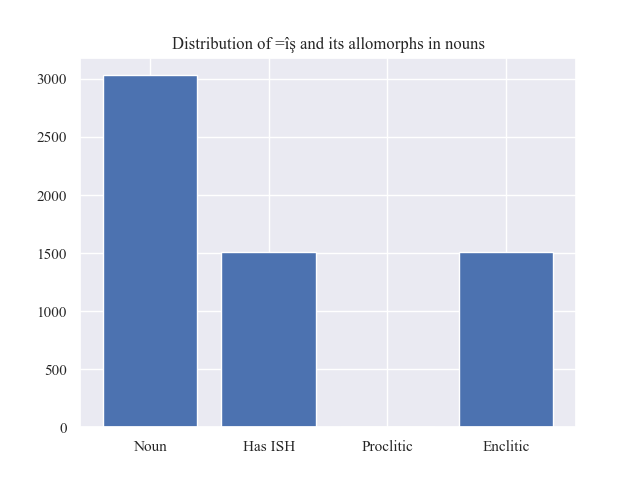

In [6]:
height = list(stats["noun"].values())
bars = list(stats["noun"].keys())
x_pos = np.arange(len(bars))
custom_labels = ["Noun", "Has ISH", "Proclitic", "Enclitic"]

plt.figure(1)
plt.bar(x_pos, height)
plt.xticks(x_pos, custom_labels)

plt.title("Distribution of =îş and its allomorphs in nouns")
plt.savefig("plots/ish_in_nouns.pdf")
plt.show()

## A2: Where does the *=îş* clitic appear in adjectives wrt the stem based on FSTs?

<IPython.core.display.Javascript object>


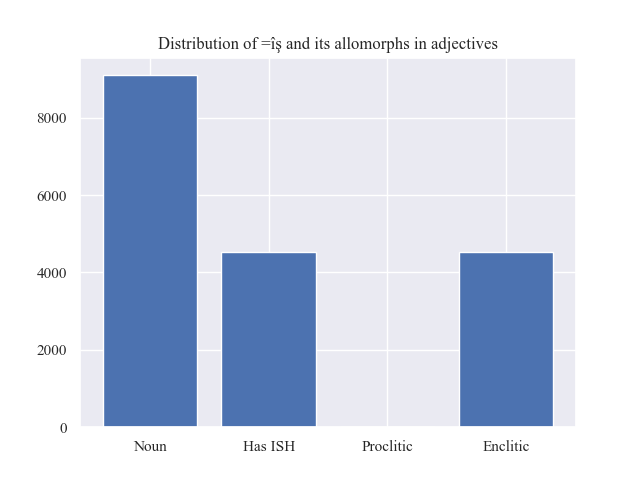

In [7]:
height = list(stats["adjective"].values())
bars = list(stats["adjective"].keys())

plt.figure(2)
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)
plt.xticks(x_pos, custom_labels)
plt.title("Distribution of =îş and its allomorphs in adjectives")
plt.savefig("plots/ish_in_adjectives.pdf")
plt.show()

## A3: Where does the *=îş* clitic appear in transitive verbs wrt the stem based on FSTs?

<IPython.core.display.Javascript object>


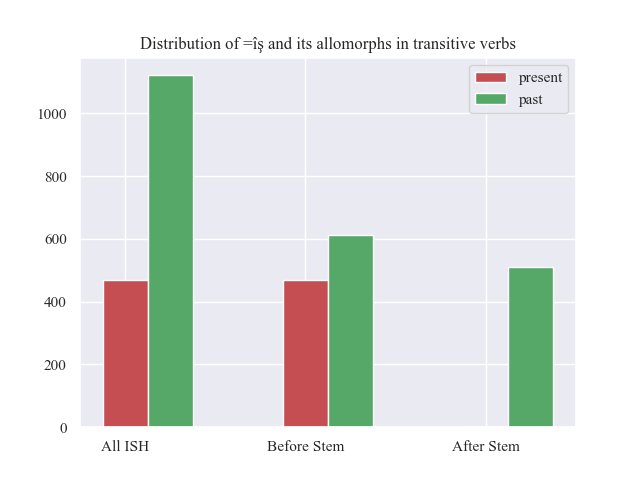

In [12]:
plot_data = [list(stats["transitive"]["present"].values()),
    list(stats["transitive"]["past"].values())]

X = list(stats["transitive"]["past"].keys())
X_axis = np.arange(len(X))
plt.figure(3)
plt.xticks(X_axis, ["All ISH", "Before Stem", "After Stem"])
plt.bar(X_axis + 0.00, plot_data[0], color = 'r', width = 0.25)
plt.bar(X_axis + 0.25, plot_data[1], color = 'g', width = 0.25)
plt.title("Distribution of =îş and its allomorphs in transitive verbs")
plt.legend(labels=['present', 'past'])
plt.savefig("plots/ish_in_transitive_verbs.pdf")
plt.show()

## A4: Where does the *=îş* clitic appear in intrasitive verbs wrt the stem based on FSTs?

<IPython.core.display.Javascript object>


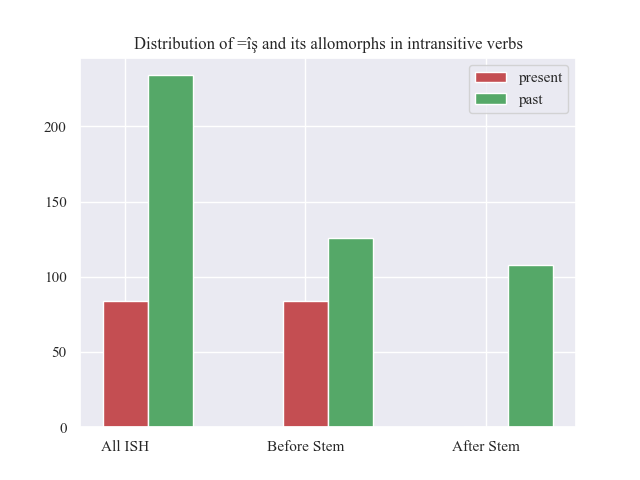

In [13]:
plot_data = [list(stats["intransitive"]["present"].values()),
    list(stats["intransitive"]["past"].values())]

X = list(stats["intransitive"]["past"].keys())
X_axis = np.arange(len(X))
plt.figure(4)
plt.xticks(X_axis, ["All ISH", "Before Stem", "After Stem"])
plt.bar(X_axis + 0.00, plot_data[0], color = 'r', width = 0.25)
plt.bar(X_axis + 0.25, plot_data[1], color = 'g', width = 0.25)
plt.title("Distribution of =îş and its allomorphs in intransitive verbs")
plt.legend(labels=['present', 'past'])
plt.savefig("plots/ish_in_intransitive_verbs.pdf")
plt.show()

# B: Analysis of the Tagged Corpus
In this section, we carry out analysis based on a tagged corpus. 

## B1: What is the distribution of the part-of-speech tags in the target corpus?

In [14]:
with open("/Users/sina/My Drive/Documentation/KurdishPOS/gold-standard/ckb_tagged_corpus.conll", "r") as f:
    tagged_corpus = f.read()

with open("/Users/sina/My Drive/Documentation/KurdishPOS/gold-standard/ckb_tagged_corpus.txt", "r") as f:
    original_tagged_corpus = f.read()

tagged_corpus_sents = tagged_corpus.replace("\n\n", "\n\t</S>\n\t<S>\n")
tags = [i.split("\t")[1] for i in tagged_corpus_sents.splitlines()]

<IPython.core.display.Javascript object>


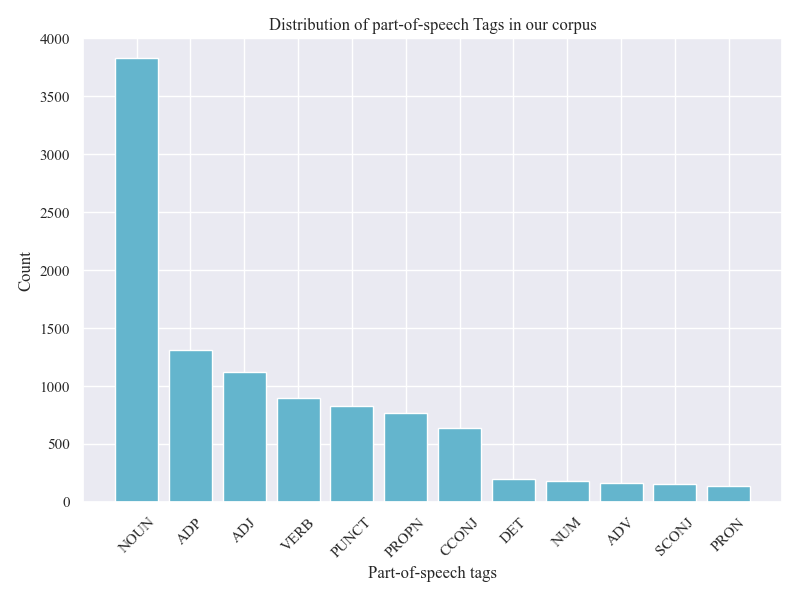

In [15]:
tags_counter = Counter(tags)
del tags_counter["<S>"]
del tags_counter["</S>"]
del tags_counter["ISH"]
del tags_counter["IZAFE"]
del tags_counter["PRN"]

sorted_items = sorted(tags_counter.items(), key=lambda x: x[1], reverse=True)
sorted_categories = [item[0] for item in sorted_items]
sorted_counts = [item[1] for item in sorted_items]

plt.figure(figsize=(8, 6))
plt.bar(sorted_categories, sorted_counts, color='c')
y_min = 0  
y_max = 4000
plt.ylim(y_min, y_max)

#plt.yscale('log')  # Set y-axis to logarithmic scale

plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.title("Distribution of part-of-speech Tags in our corpus")
plt.xlabel("Part-of-speech tags")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plots/pos_distribution.pdf")
plt.show()

## B2: What hosts do the target clitics appear more with?

In [16]:
map_UD_tags = {
	"(ADJ)": "(ADJ)",
	"(ADJ+ISH)": "(ADJ)",
	"(ADJ+ISH+PRN)": "(ADJ)",
	"(ADJ+ISH-PART)": "(ADJ)",
	"(ADJ+IZAFE)": "(ADJ)",
	"(ADJ+PART)": "(ADJ)",
	"(ADJ+PRN)": "(ADJ)",
	"(ADJ+PRN+IZAFE)": "(ADJ)",
	"(ADJ+PRN+PRN)": "(ADJ)",
	"(ADJ-COMPR)": "(ADJ)",
	"(ADJ-COMPR+ISH)": "(ADJ)",
	"(ADJ-COMPR+IZAFE)": "(ADJ)",
	"(ADJ-COMPR+PRN)": "(ADJ)",
	"(ADJ-DEF)": "(ADJ)",
	"(ADJ-DEF+IZAFE)": "(ADJ)",
	"(ADJ-DEF+PRN)": "(ADJ)",
	"(ADJ-DEF-PL)": "(ADJ)",
	"(ADJ-DEF-PL+ISH)": "(ADJ)",
	"(ADJ-DEF-PL+ISH+PRN)": "(ADJ)",
	"(ADJ-DEF-PL+IZAFE)": "(ADJ)",
	"(ADJ-DEF-PL+PRN)": "(ADJ)",
	"(ADJ-DEF-PL-PART)": "(ADJ)",
	"(ADJ-INDEF)": "(ADJ)",
	"(ADJ-PART)": "(ADJ)",
	"(ADJ-PL)": "(ADJ)",
	"(ADJ-PL+IZAFE)": "(ADJ)",
	"(ADJ-PRN)": "(ADJ)",
	"(ADJ-SUPR)": "(ADJ)",
	"(ADP)": "(ADP)",
	"(ADP+ISH)": "(ADP)",
	"(ADP+IZAFE)": "(ADP)",
	"(ADP+PART)": "(ADP)",
	"(ADP+PRN)": "(ADP)",
	"(ADP+PRN+PART)": "(ADP)",
	"(ADV)": "(ADV)",
	"(ADV+ISH)": "(ADV)",
	"(ADV+IZAFE)": "(ADV)",
	"(ADV-PART)": "(ADV)",
	"(CCONJ)": "(CCONJ)",
	"(DET)": "(DET)",
	"(DET+ISH)": "(DET)",
	"(ISH+PRN+VERB)": "(VERB)",
	"(ISH+VERB+PRN)": "(VERB)",
	"(IZAFE)": "(IZAFE)",
	"(NOUN)": "(NOUN)",
	"(NOUN+ISH)": "(NOUN)",
	"(NOUN+ISH+IZAFE)": "(NOUN)",
	"(NOUN+ISH+PRN)": "(NOUN)",
	"(NOUN+ISH-PART)": "(NOUN)",
	"(NOUN+IZAFE)": "(NOUN)",
	"(NOUN+PART)": "(NOUN)",
	"(NOUN+PRN)": "(NOUN)",
	"(NOUN+PRN+PART)": "(NOUN)",
	"(NOUN+PRN+PRN)": "(NOUN)",
	"(NOUN-ADJ-DEF-PL)": "(NOUN)",
	"(NOUN-DEF)": "(NOUN)",
	"(NOUN-DEF+ISH)": "(NOUN)",
	"(NOUN-DEF+IZAFE)": "(NOUN)",
	"(NOUN-DEF+PRN)": "(NOUN)",
	"(NOUN-DEF-PART)": "(NOUN)",
	"(NOUN-DEF-PL)": "(NOUN)",
	"(NOUN-DEF-PL+ISH)": "(NOUN)",
	"(NOUN-DEF-PL+IZAFE)": "(NOUN)",
	"(NOUN-DEF-PL+PRN)": "(NOUN)",
	"(NOUN-DEF-PL-PART)": "(NOUN)",
	"(NOUN-DEF-PL-PRN-PART)": "(NOUN)",
	"(NOUN-INDEF)": "(NOUN)",
	"(NOUN-INDEF+IZAFE)": "(NOUN)",
	"(NOUN-INDEF+PRN)": "(NOUN)",
	"(NOUN-INDEF-PART)": "(NOUN)",
	"(NOUN-PART)": "(NOUN)",
	"(NOUN-PL)": "(NOUN)",
	"(NOUN-PL+ISH)": "(NOUN)",
	"(NOUN-PL+IZAFE)": "(NOUN)",
	"(NOUN-PL+PRN)": "(NOUN)",
	"(NOUN-PL-DEF)": "(NOUN)",
	"(NOUN-PL-DEF+ISH)": "(NOUN)",
	"(NOUN-PL-DEF+IZAFE)": "(NOUN)",
	"(NOUN-PL-DEF+PRN)": "(NOUN)",
	"(NOUN-PL-INDEF)": "(NOUN)",
	"(NOUN-PL-PART)": "(NOUN)",
	"(NOUN-SG)": "(NOUN)",
	"(NOUN-SG+IZAFE)": "(NOUN)",
	"(NOUN-SG+PRN)": "(NOUN)",
	"(NOUN-SG-DEF)": "(NOUN)",
	"(NOUN-SG-DEF+ISH)": "(NOUN)",
	"(NOUN-SG-DEF+ISH+PRN)": "(NOUN)",
	"(NOUN-SG-DEF+IZAFE)": "(NOUN)",
	"(NOUN-SG-DEF+PRN)": "(NOUN)",
	"(NOUN-SG-DEF+PRN+PART)": "(NOUN)",
	"(NOUN-SG-DEF-PART)": "(NOUN)",
	"(NOUN-SG-DET)": "(NOUN)",
	"(NOUN-SG-INDEF)": "(NOUN)",
	"(NOUN-SG-INDEF+ISH)": "(NOUN)",
	"(NOUN-SG-INDEF+IZAFE)": "(NOUN)",
	"(NOUN-SG-INDEF+PART)": "(NOUN)",
	"(NOUN-SG-INDEF+PRN)": "(NOUN)",
	"(NOUN-SG-INDEF-PART)": "(NOUN)",
	"(NOUN-SG-PART)": "(NOUN)",
	"(NOUN-SING-DEF)": "(NOUN)",
	"(NOUN-SING-INDEF)": "(NOUN)",
	"(NOUN-SING-INDEF+IZAFE)": "(NOUN)",
	"(NUM)": "(NUM)",
	"(NUM+IZAFE)": "(NUM)",
	"(PRN)": "(PRN)",
	"(PRN+VERB)": "(VERB)",
	"(PRON)": "(PRON)",
	"(PRON+ISH)": "(PRON)",
	"(PRON+ISH+PRN)": "(PRON)",
	"(PRON+IZAFE)": "(PRON)",
	"(PRON+PART)": "(PRON)",
	"(PRON+PRN)": "(PRON)",
	"(PRON+PRN+PART)": "(PRON)",
	"(PRON+VERB)": "(PRON)",
	"(PROPN)": "(PROPN)",
	"(PROPN+ISH)": "(PROPN)",
	"(PROPN+IZAFE)": "(PROPN)",
	"(PROPN+IZAFE+IZAFE)": "(PROPN)",
	"(PROPN+PART)": "(PROPN)",
	"(PROPN+PRN)": "(PROPN)",
	"(PUNCT)": "(PUNCT)",
	"(SCONJ)": "(SCONJ)",
	"(VERB)": "(VERB)",
	"(VERB+ISH+PRN)": "(VERB)"
}

In [17]:
pattern = r'\(\S*\)'
matches = re.findall(pattern, original_tagged_corpus)
target_hosts = {"Pron.": {}, "ISH": {}, "Pron. & ISH": {}}

for i in matches:
    if i != "(ISH)" and i != "(PRN)":
        i_tag = map_UD_tags[i].replace("(", "").replace(")", "")
        if "ISH" in i and "PRN" in i:
            if i_tag in target_hosts["Pron. & ISH"]:
                target_hosts["Pron. & ISH"][i_tag] += 1
            else:
                target_hosts["Pron. & ISH"][i_tag] = 1
                
        elif "ISH" in i:
            if i_tag in target_hosts["ISH"]:
                target_hosts["ISH"][i_tag] += 1
            else:
                target_hosts["ISH"][i_tag] = 1
                
        elif "PRN" in i:
            if i_tag in target_hosts["Pron."]:
                target_hosts["Pron."][i_tag] += 1
            else:
                target_hosts["Pron."][i_tag] = 1


<IPython.core.display.Javascript object>


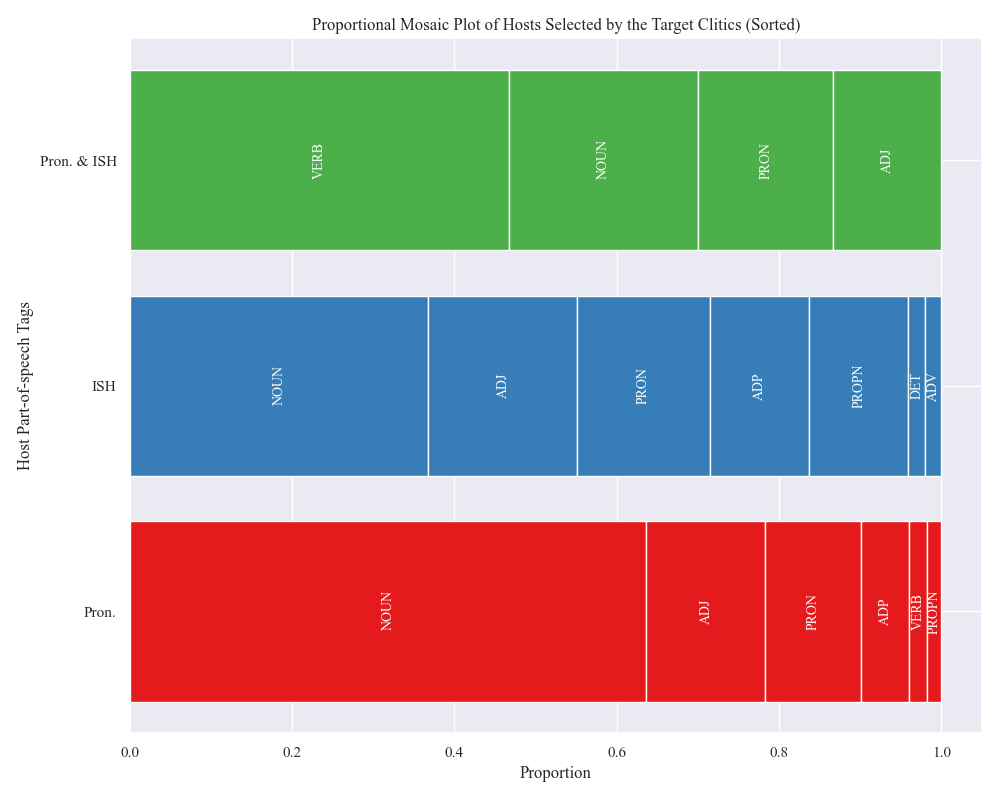

In [18]:
flat_data = []
custom_palette = sns.color_palette("Set1")

for outer_key, inner_dict in target_hosts.items():
    total_count = sum(inner_dict.values())
    for inner_key, count in inner_dict.items():
        proportion = count / total_count
        flat_data.append((outer_key, inner_key, proportion))

df = pd.DataFrame(flat_data, columns=['Outer', 'Inner', 'Proportion'])

proportions_dict = defaultdict(list)
for _, row in df.iterrows():
    proportions_dict[row['Outer']].append((row['Inner'], row['Proportion']))

# Sort the inner categories within each outer category based on proportion
for outer_category, inner_data in proportions_dict.items():
    sorted_inner_data = sorted(inner_data, key=lambda x: x[1], reverse=True)
    proportions_dict[outer_category] = sorted_inner_data

fig, ax = plt.subplots(figsize=(10, 8))

for idx, (outer_category, sorted_inner_data) in enumerate(proportions_dict.items()):
    total_proportion = sum([item[1] for item in sorted_inner_data])
    x_start = 0
    for inner_category, proportion in sorted_inner_data:
        color = custom_palette[idx % len(custom_palette)]  # Cycle through the custom colors
        ax.barh(outer_category, proportion, left=x_start, color=color)
        x_middle = x_start + (proportion / 2)
        ax.text(x_middle, outer_category, inner_category, color='white', va='center', ha='center', fontsize=10, rotation='vertical')
        x_start += proportion

ax.set_xlabel("Proportion")
ax.set_ylabel("Host Part-of-speech Tags")
ax.set_title("Proportional Mosaic Plot of Hosts Selected by the Target Clitics (Sorted)")

plt.tight_layout()
plt.savefig("plots/proportion_clitics_per_host.pdf")
plt.show()


## B3: What is the frequency of POS tags based on their position in a sentence?

In [19]:
def sort_and_limit_dict_of_dicts(input_dict, limit=3):
    sorted_dict = {}
    for key, value in input_dict.items():
        sorted_items = sorted(value.items(), key=lambda item: item[1], reverse=True)[:limit]
        sorted_dict[key] = dict(sorted_items)
    
    return sorted_dict


def normalize_dict_of_dicts(input_dict, limit=10):
    # Sort the inner dictionaries by value in decreasing order
    sorted_dict = {key: dict(sorted(value.items(), key=lambda item: item[1], reverse=True)) for key, value in input_dict.items()}
    
    normalized_dict = {}
    for key, value in sorted_dict.items():
        total = sum(value.values())
        normalized_values = {inner_key: round(inner_value / total, 3) for inner_key, inner_value in value.items()}
        normalized_dict[key] = normalized_values
    
    limited_dict = {key: {inner_key: inner_value for inner_key, inner_value in value.items() if inner_key in list(value)[:limit]} for key, value in normalized_dict.items()}
    
    return limited_dict


pos_positions = {}#, "Pron. & ISH": {}}
for sent in original_tagged_corpus.splitlines():
    pattern = r'\(\S*\)'
    matches = re.findall(pattern, sent)
    for l in range(0, len(matches)):
        i = matches[l]
        if i != "(ISH)" and i != "(PRN)":
            i_tag = map_UD_tags[i].replace("(", "").replace(")", "")
            if l+1 in pos_positions:
                if i_tag in pos_positions[l+1]:
                    pos_positions[l+1][i_tag] += 1
                else:
                    pos_positions[l+1].update({i_tag: 1})
            else:
                pos_positions.update({l+1 : {i_tag: 1}})

norm_pos_positions = normalize_dict_of_dicts(pos_positions)

new_pos_positions = dict()
for i in norm_pos_positions:
    if i < 50:
        # [NOUN ADP PROPN ADJ DET VERB]
        new_pos_positions.update({i: {
            "NOUN": norm_pos_positions[i].get("NOUN", 0),
            "ADP": norm_pos_positions[i].get("ADP", 0),
            "ADJ": norm_pos_positions[i].get("ADJ", 0),
            "DET": norm_pos_positions[i].get("DET", 0),
            "PROPN": norm_pos_positions[i].get("PROPN", 0),
            "VERB": norm_pos_positions[i].get("VERB", 0)
        }})

<IPython.core.display.Javascript object>


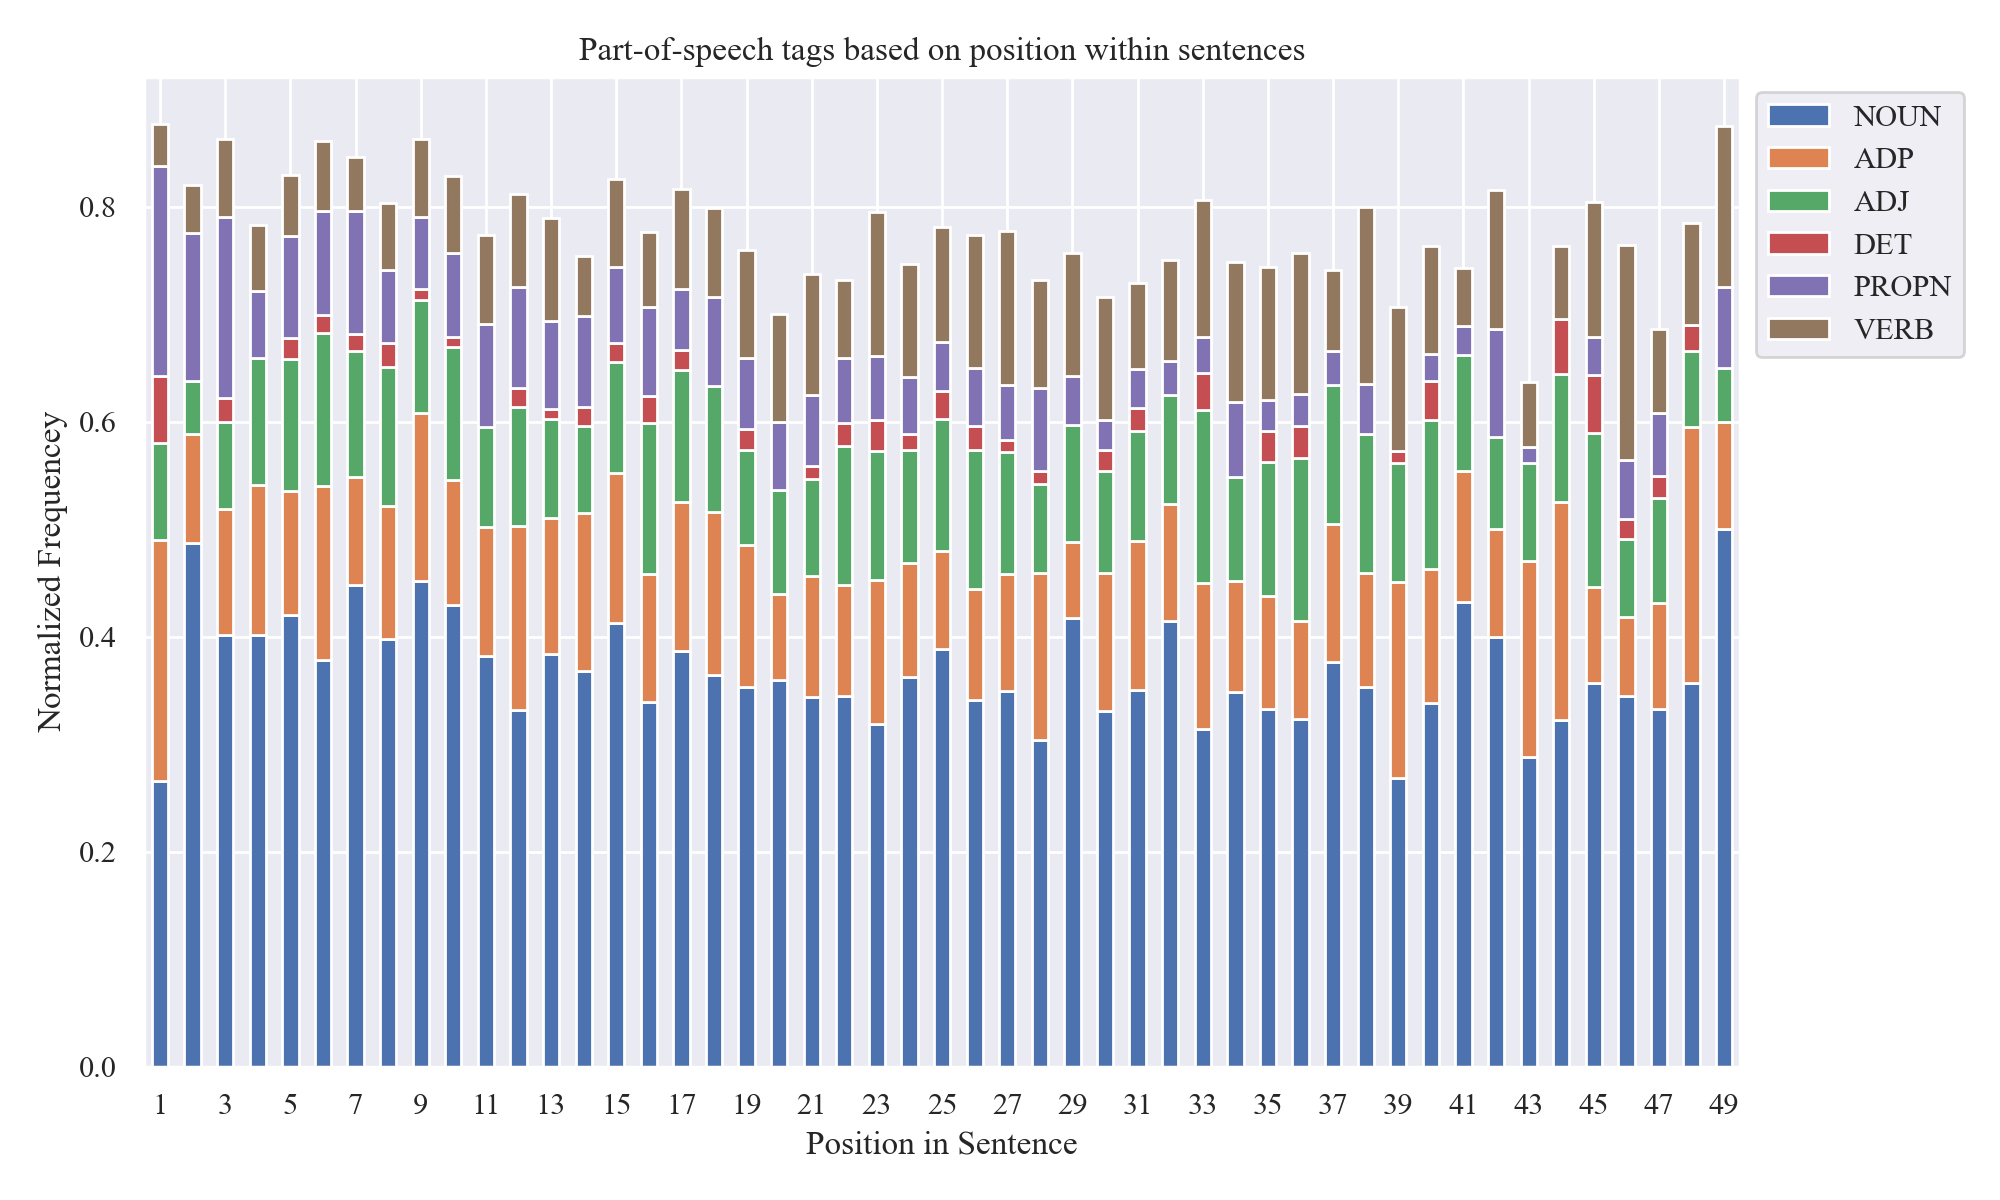

In [65]:
# Create a DataFrame from the data dictionary
df = pd.DataFrame(new_pos_positions).T

# Create a stacked bar plot
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xticks(ax.get_xticks()[::2])
# Set labels and title
ax.set_xlabel('Position in Sentence')
ax.set_ylabel('Normalized Frequencey')
ax.set_title('Part-of-speech tags based on position within sentences')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)

plt.xticks(rotation=0) 

plt.tight_layout()
plt.savefig("plots/pos_per_position.pdf")
plt.show()

## B4: Where do the target clitics tend to appear more within a sentence?

In [20]:
positions = {"Pron.": {}, "ISH": {}}#, "Pron. & ISH": {}}
for sent in original_tagged_corpus.splitlines():
    pattern = r'\(\S*\)'
    matches = re.findall(pattern, sent)
    for l in range(len(matches)):
        i = matches[l]
        if i != "(ISH)" and i != "(PRN)":
            if "ISH" in i:
                if l+1 in positions["ISH"]:
                    positions["ISH"][l+1] += 1
                else:
                    positions["ISH"][l+1] = 1

            elif "PRN" in i:
                if l+1 in positions["Pron."]:
                    positions["Pron."][l+1] += 1
                else:
                    positions["Pron."][l+1] = 1

#sorted_positions = sort_and_limit_dict_of_dicts(positions)
sorted_positions = {"Pron.": {}, "ISH": {}}
for j in ["Pron.", "ISH"]:
    for i in range(1, 10):
        sorted_positions[j].update({i: positions[j].get(i, 0)})

<IPython.core.display.Javascript object>


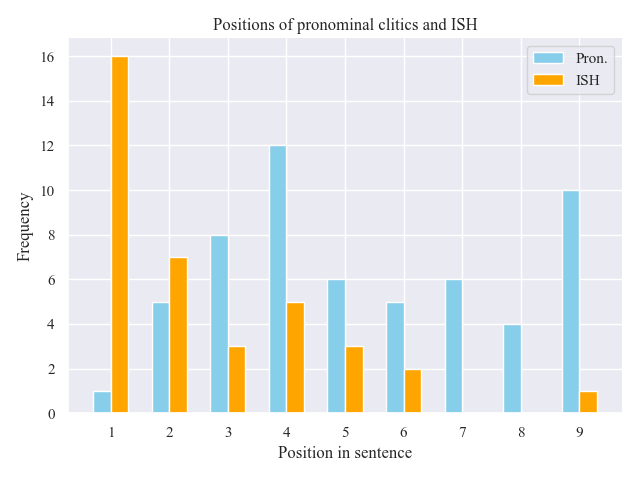

In [21]:
subcategories = list(sorted_positions['Pron.'].keys())
categories = list(sorted_positions.keys())

pron_positions = [sorted_positions['Pron.'].get(subcat, 0) for subcat in subcategories]
ish_positions = [sorted_positions['ISH'].get(subcat, 0) for subcat in subcategories]

# Width of the bars
bar_width = 0.6

# Calculate the x-axis positions for double bars
index = np.arange(len(subcategories)) * 2

# Create a double bar plot for both "Pron." and "ISH"
fig, ax = plt.subplots()

ax.bar(index, pron_positions, bar_width, label='Pron.', color='skyblue')
ax.bar(index + bar_width, ish_positions, bar_width, label='ISH', color='orange')

ax.set_xlabel('Position in sentence')
ax.set_ylabel('Frequency')
ax.set_title('Positions of pronominal clitics and ISH')

# Set x-axis ticks and labels
x_ticks = index + bar_width / 2
ax.set_xticks(x_ticks)
ax.set_xticklabels(subcategories)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("plots/clitics_position.pdf")
plt.show()

## B5: What is the frequency of hosts of the target clitics based on position within a sentence?

In [22]:
positions = {"Pron.": {}, "ISH": {}}#, "Pron. & ISH": {}}
for sent in original_tagged_corpus.splitlines():
    pattern = r'\(\S*\)'
    matches = re.findall(pattern, sent)
    for l in range(len(matches)):
        i = matches[l]
        if i != "(ISH)" and i != "(PRN)":
            i_tag = map_UD_tags[i].replace("(", "").replace(")", "")
            if "ISH" in i:
                if l+1 in positions["ISH"]:
                    if i_tag in positions["ISH"][l+1]:
                        positions["ISH"][l+1][i_tag] += 1
                    else:
                        positions["ISH"][l+1].update({i_tag: 1})  
                else:
                    positions["ISH"].update({l+1: {i_tag: 1}})

            elif "PRN" in i:
                if l+1 in positions["Pron."]:
                    if i_tag in positions["Pron."][l+1]:
                        positions["Pron."][l+1][i_tag] += 1
                    else:
                        positions["Pron."][l+1].update({i_tag: 1})  
                else:
                    positions["Pron."].update({l+1: {i_tag: 1}})

norm_positions = {"Pron.": normalize_dict_of_dicts(positions["Pron."]), "ISH": normalize_dict_of_dicts(positions["ISH"])}

categorical_clitic_positions = {"Pron.": {}, "ISH": {}}
for j in ["Pron.", "ISH"]:
    for i in range(1, 10):
        categorical_clitic_positions[j].update({i: norm_positions[j].get(i, 0)})

<IPython.core.display.Javascript object>


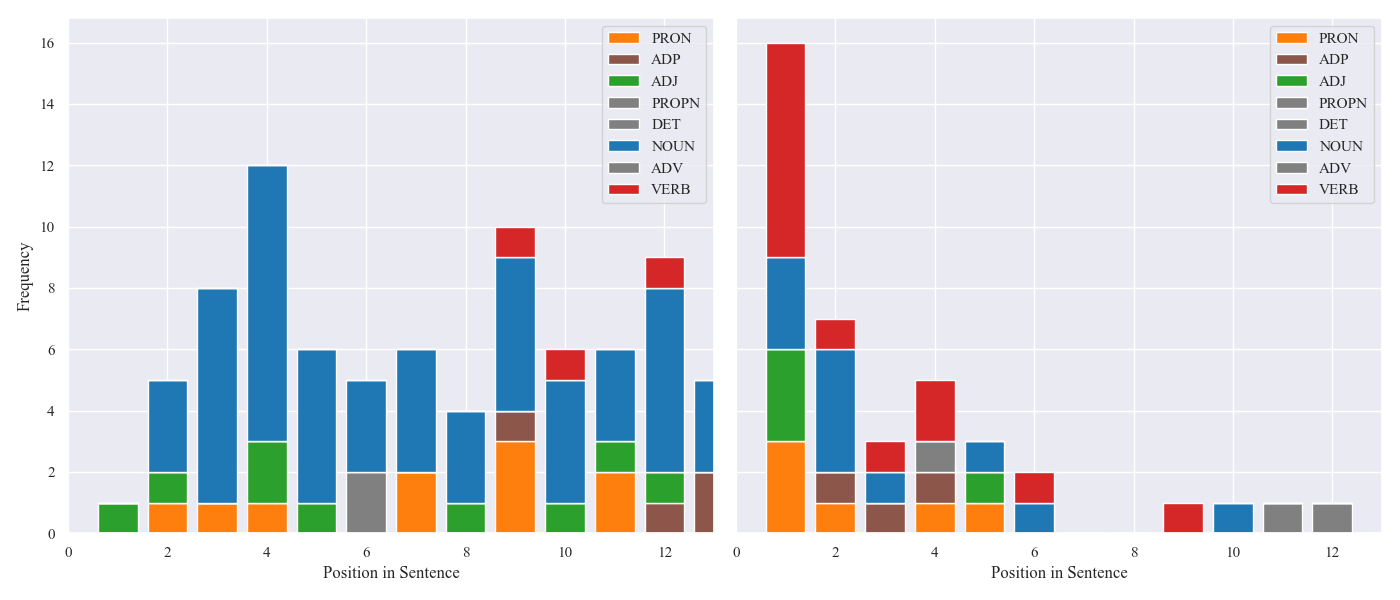

In [23]:
categories = list(positions.keys())
subcategories = list(set(sub for d in positions.values() for sub in d.keys()))
values = list(set(val for d in positions.values() for sub in d.values() for val in sub.keys()))

num_categories = len(categories)
num_subcategories = len(subcategories)

color_palette = {
    'NOUN': '#1f77b4',
    'PRON': '#ff7f0e',
    'ADJ': '#2ca02c',
    'VERB': '#d62728',
    'PRN': '#9467bd',
    'ADP': '#8c564b',
}

data_values = {
    value: [[positions[category].get(subcategory, {}).get(value, 0) for subcategory in subcategories] for category in categories]
    for value in values
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, category in zip(axes, categories):
    bottoms = [0] * num_subcategories
    for value in values:
        color = color_palette.get(value, 'gray')  # Get color from palette or use gray as default
        ax.bar(range(1, num_subcategories + 1), data_values[value][categories.index(category)], label=value, color=color, bottom=bottoms)
        bottoms = [bottom + data_values[value][categories.index(category)][i] for i, bottom in enumerate(bottoms)]
#    ax.set_title(f'Position of {category}')
    ax.set_xlabel('Position in Sentence')
    
    # Setting x-axis limits
    ax.set_xlim(0, 13)#num_subcategories)
    
    ax.legend()

axes[0].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("plots/clitic_pos_position.pdf")
plt.show()

## B6: Within a word form, where do the target clitics appear with respect to the host?

In [24]:
def clitic_position_wrt_host(word_tag, host_tag, clitic):
    # find the relative place of the target clitic wrt to the host
    if word_tag.index(host_tag) < word_tag.index(clitic):
        return "after" # clitic appears after the host
    else:
        return "before" # clitic appears before the host

target_clitics = {
	"ISH": {i: original_tagged_corpus.count(i) for i in re.findall(r'\(\S*ISH\S*\)', original_tagged_corpus)},
	"PRN": {i: original_tagged_corpus.count(i) for i in re.findall(r'\(\S*PRN\S*\)', original_tagged_corpus)},
	"ISH_PRN": {i: original_tagged_corpus.count(i) for i in re.findall(r'\(\S*ISH\+PRN\S*\)', original_tagged_corpus)},
	"PRN_ISH": {i: original_tagged_corpus.count(i) for i in re.findall(r'\(\S*PRN\+ISH\S*\)', original_tagged_corpus)}
}

target_clitics_positions = {
                            "ISH": {"before": {}, "after": {}}, 
                            "PRN": {"before": {}, "after": {}}
                           }

for i in target_clitics:
    if i == "ISH" or i == "PRN":
        for j in target_clitics[i]:

            j_host_post = map_UD_tags[j].replace("(", "").replace(")", "")
            if j_host_post != "ISH" and j_host_post != "PRN":
                j_position = clitic_position_wrt_host(j, j_host_post, i)

                if j_host_post in target_clitics_positions[i][j_position]:
                    target_clitics_positions[i][j_position][j_host_post] += target_clitics[i][j]
                else:
                    target_clitics_positions[i][j_position].update({j_host_post: target_clitics[i][j]})


print(target_clitics_positions)

{'ISH': {'before': {'VERB': 7}, 'after': {'ADJ': 13, 'NOUN': 25, 'PRON': 13, 'VERB': 7, 'ADP': 6, 'DET': 1, 'PROPN': 6, 'ADV': 1}}, 'PRN': {'before': {'VERB': 12}, 'after': {'PRON': 37, 'NOUN': 180, 'ADP': 16, 'ADJ': 44, 'VERB': 8, 'PROPN': 5}}}


<IPython.core.display.Javascript object>


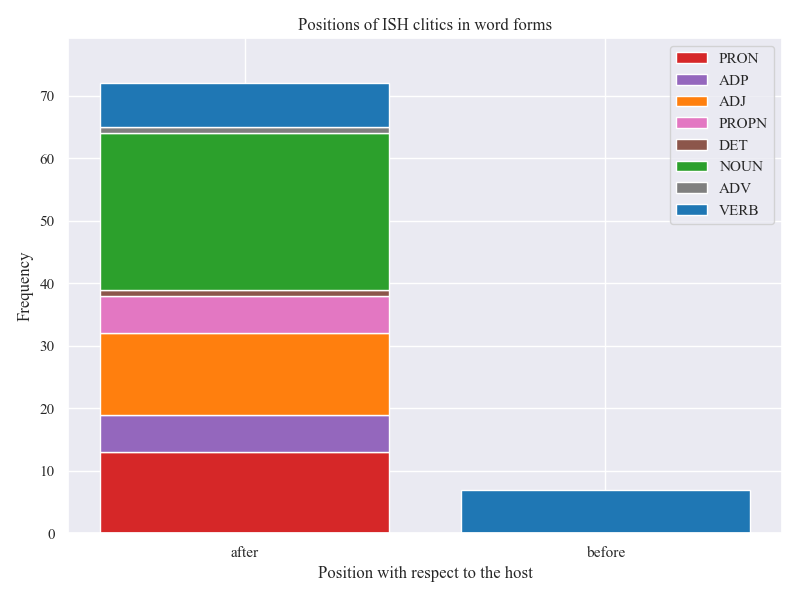

In [25]:
categories = list(target_clitics_positions.keys())
positions = list(set(pos for d in target_clitics_positions.values() for pos in d.keys()))
values = list(set(val for d in target_clitics_positions.values() for pos in d.values() for val in pos.keys()))

num_categories = len(categories)
num_positions = len(positions)

color_palette = {
    'VERB': '#1f77b4', 
    'ADJ': '#ff7f0e',  
    'NOUN': '#2ca02c', 
    'PRON': '#d62728', 
    'ADP': '#9467bd',  
    'DET': '#8c564b',  
    'PROPN': '#e377c2',
    'ADV': '#7f7f7f',  
}

data_values = {
    value: [[target_clitics_positions['ISH'][position].get(value, 0) for position in positions]]
    for value in values
}

fig, ax = plt.subplots(figsize=(8, 6))

bottoms = [0] * num_positions
for value in values:
    color = color_palette.get(value, 'gray')  
    bars = ax.bar(range(num_positions), data_values[value][0], color=color, bottom=bottoms, label=value)
    bottoms = [bottom + data_values[value][0][i] for i, bottom in enumerate(bottoms)]

ax.set_title('Positions of ISH clitics in word forms')
ax.set_xlabel('Position with respect to the host')
ax.set_xticks(range(num_positions))
ax.set_xticklabels(['after', 'before'])
ax.legend()

ax.set_ylim(0, max(bottoms) * 1.1)  # Add some margin for visualization

ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("plots/ish_clitics_position_per_pos.pdf")
plt.show()


<IPython.core.display.Javascript object>


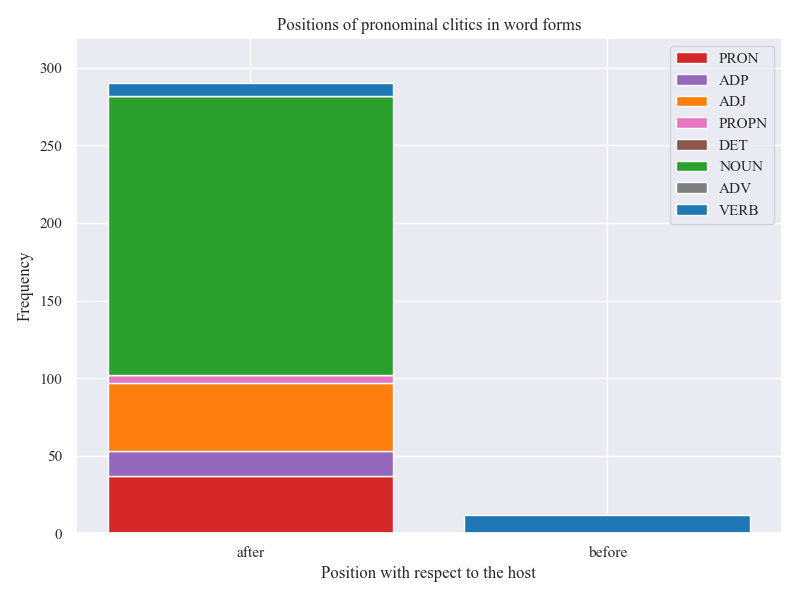

In [26]:
data_values = {
    value: [[target_clitics_positions['PRN'][position].get(value, 0) for position in positions]]
    for value in values
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bottoms = [0] * num_positions
for value in values:
    color = color_palette.get(value, 'gray')  # Get color from palette or use gray as default
    bars = ax.bar(range(num_positions), data_values[value][0], color=color, bottom=bottoms, label=value)
    bottoms = [bottom + data_values[value][0][i] for i, bottom in enumerate(bottoms)]

ax.set_title('Positions of pronominal clitics in word forms')
ax.set_xlabel('Position with respect to the host')
ax.set_xticks(range(num_positions))
ax.set_xticklabels(['after', 'before'])  # Set x-axis labels to 'before' and 'after'
ax.legend()

# Adjust y-axis range based on the maximum value of this plot
ax.set_ylim(0, max(bottoms) * 1.1)  # Add some margin for visualization

ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("plots/prn_clitics_position_per_pos.pdf")
plt.show()


## B7: Within a word form, where do the target clitics appear with respect to the host and to each other?

In [27]:
ISH_PRN_positions = {"ISH_PRN": {"before": {}, "after": {}}}

for i in target_clitics["ISH_PRN"]:
    i_host_post = map_UD_tags[i].replace("(", "").replace(")", "")
    if i_host_post != "ISH" and j_host_post != "PRN":
        i_position = clitic_position_wrt_host(i, i_host_post, "ISH+PRN")
        #target_clitics_positions["ISH_PRN"][j_position].update(
        if i_host_post in ISH_PRN_positions["ISH_PRN"][i_position]:
            ISH_PRN_positions["ISH_PRN"][i_position][i_host_post] += target_clitics["ISH_PRN"][i]
        else:
            ISH_PRN_positions["ISH_PRN"][i_position].update({i_host_post: target_clitics["ISH_PRN"][i]})

ISH_PRN_positions

{'ISH_PRN': {'before': {'VERB': 6},
  'after': {'NOUN': 7, 'ADJ': 4, 'VERB': 7, 'PRON': 5}}}

<IPython.core.display.Javascript object>


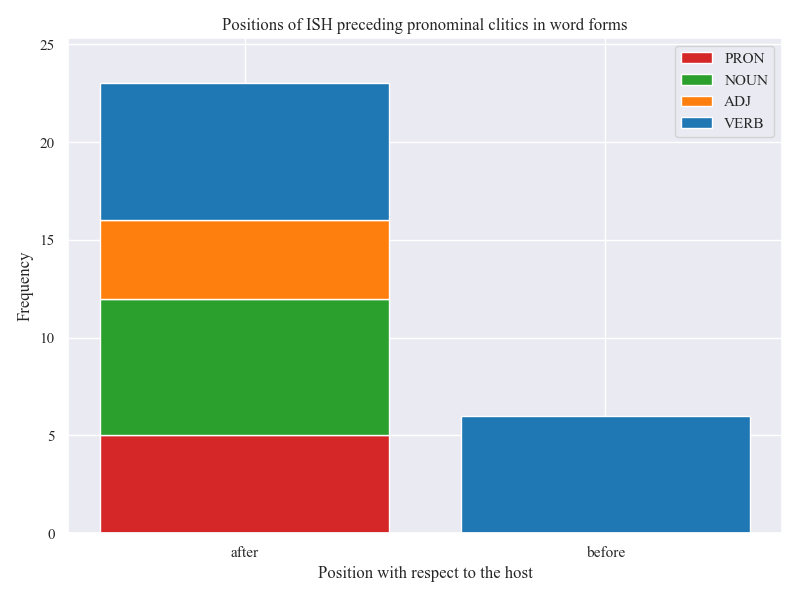

In [28]:
categories = list(ISH_PRN_positions.keys())
positions = list(set(pos for d in ISH_PRN_positions.values() for pos in d.keys()))
values = list(set(val for d in ISH_PRN_positions.values() for pos in d.values() for val in pos.keys()))

num_categories = len(categories)
num_positions = len(positions)

color_palette = {
    'VERB': '#1f77b4', 
    'ADJ': '#ff7f0e',  
    'NOUN': '#2ca02c', 
    'PRON': '#d62728', 
    'ADP': '#9467bd',  
    'DET': '#8c564b',  
    'PROPN': '#e377c2',
    'ADV': '#7f7f7f',  
}

# Initialize data for each value
data_values = {
    value: [[ISH_PRN_positions['ISH_PRN'][position].get(value, 0) for position in positions]]
    for value in values
}

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bottoms = [0] * num_positions
for value in values:
    color = color_palette.get(value, 'gray')  
    bars = ax.bar(range(num_positions), data_values[value][0], color=color, bottom=bottoms, label=value)
    bottoms = [bottom + data_values[value][0][i] for i, bottom in enumerate(bottoms)]

ax.set_title('Positions of ISH preceding pronominal clitics in word forms')
ax.set_xlabel('Position with respect to the host')
ax.set_xticks(range(num_positions))
ax.set_xticklabels(['after', 'before'])
ax.legend()

ax.set_ylim(0, max(bottoms) * 1.1)  # Add some margin for visualization

ax.set_ylabel('Frequency')
plt.tight_layout()
plt.savefig("plots/ish_prn_clitics_position_per_pos.pdf")
plt.show()


- No "PRN_ISH" is found in the tagged corpus.
- PRON refer to the reflexive pronoun "xo"

# Cross-lingual analysis

## C1: How does the same clitic (in function) appear in Farsi?
(based on the colloquial Persian treebank: https://github.com/royakabiri/iPerUDT)

In [29]:
iPerUDT = open("resources/iPerUDT.conllu", "r", encoding="utf-8")
sentences = parse(iPerUDT.read())

count_free_morpheme, count_clitic = 0, 0
previous_free_morpheme, previous_clitic = dict(), dict()

for sentence in sentences:
    for i in range(len(sentence)):
        token = sentence[i]
        if token["deprel"] == "discourse:top/foc" and token["lemma"] == "هم":

            if token["form"] == "هم":
                count_free_morpheme += 1

                if sentence[i-1]["upos"] not in previous_free_morpheme:
                    previous_free_morpheme.update({sentence[i-1]["upos"]: 1})
                else:
                    previous_free_morpheme[sentence[i-1]["upos"]] += 1

            elif token["form"] == "م":
                count_clitic += 1

                if sentence[i-1]["upos"] not in previous_clitic:
                    previous_clitic.update({sentence[i-1]["upos"]: 1})
                else:
                    previous_clitic[sentence[i-1]["upos"]] += 1

del previous_free_morpheme["PUNCT"]
print("هم appears %d times as a free morpheme and %d as a clitic."%(count_free_morpheme, count_clitic))
print("Overall, it appears %d times in the corpus."%(count_free_morpheme + count_clitic))

print(previous_free_morpheme)
print(previous_clitic)

هم appears 383 times as a free morpheme and 103 as a clitic.
Overall, it appears 486 times in the corpus.
{'PART': 35, 'NOUN': 120, 'ADV': 58, 'ADJ': 61, 'PRON': 74, 'X': 6, 'VERB': 8, 'AUX': 8, 'SCONJ': 2, 'PROPN': 7, 'NUM': 2}
{'NOUN': 15, 'PRON': 60, 'ADV': 25, 'ADJ': 2, 'INTJ': 1}


<IPython.core.display.Javascript object>


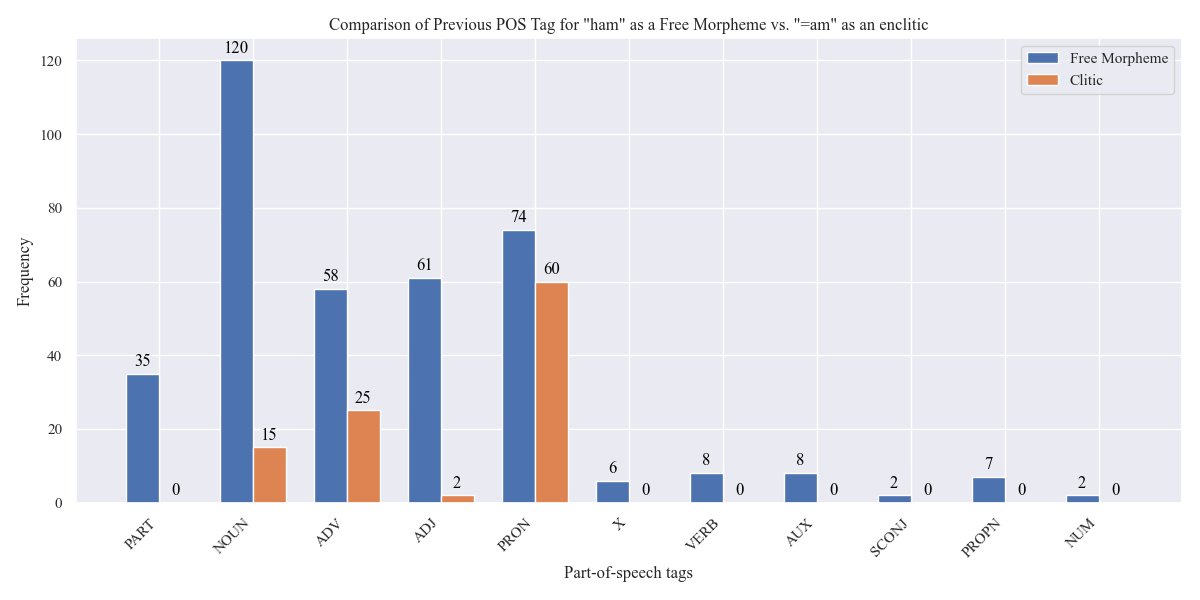

In [30]:
categories = list(previous_free_morpheme.keys())

counts_free_morpheme = [previous_free_morpheme.get(cat, 0) for cat in categories]
counts_clitic = [previous_clitic.get(cat, 0) for cat in categories]

bar_width = 0.35
bar_positions = range(len(categories))
bar_positions_free_morpheme = [pos - bar_width/2 for pos in bar_positions]
bar_positions_clitic = [pos + bar_width/2 for pos in bar_positions]

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars_free_morpheme = ax.bar(bar_positions_free_morpheme, counts_free_morpheme, bar_width, label='Free Morpheme')
bars_clitic = ax.bar(bar_positions_clitic, counts_clitic, bar_width, label='Clitic')

ax.set_title('Comparison of Previous POS Tag for "ham" as a Free Morpheme vs. "=am" as an enclitic')
ax.set_xlabel('Part-of-speech tags')
ax.set_ylabel('Frequency')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval), ha='center', va='bottom', color='black')

autolabel(bars_free_morpheme)
autolabel(bars_clitic)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plots/ham_in_Persian.pdf")
plt.show()

## C2: How does the same clitic (in function) appear in Kurmanji?

In [31]:
kmr_ud = open("resources/kmr-ud.conllu", "r", encoding="utf-8")
sentences = parse(kmr_ud.read())

previous_free_morpheme = dict()

for sentence in sentences:
    for i in range(len(sentence)):
        token = sentence[i]
        if token["xpos"] == "emph":
            if sentence[i-1]["upos"] not in previous_free_morpheme:
                previous_free_morpheme.update({sentence[i-1]["upos"]: 1})
            else:
                previous_free_morpheme[sentence[i-1]["upos"]] += 1
print(previous_free_morpheme)

{'ADV': 7, 'NOUN': 28, 'PRON': 25, 'PROPN': 11, 'NUM': 2, 'VERB': 2, 'ADP': 4, 'ADJ': 8, 'SCONJ': 1, 'CCONJ': 5, 'PUNCT': 2}


<IPython.core.display.Javascript object>


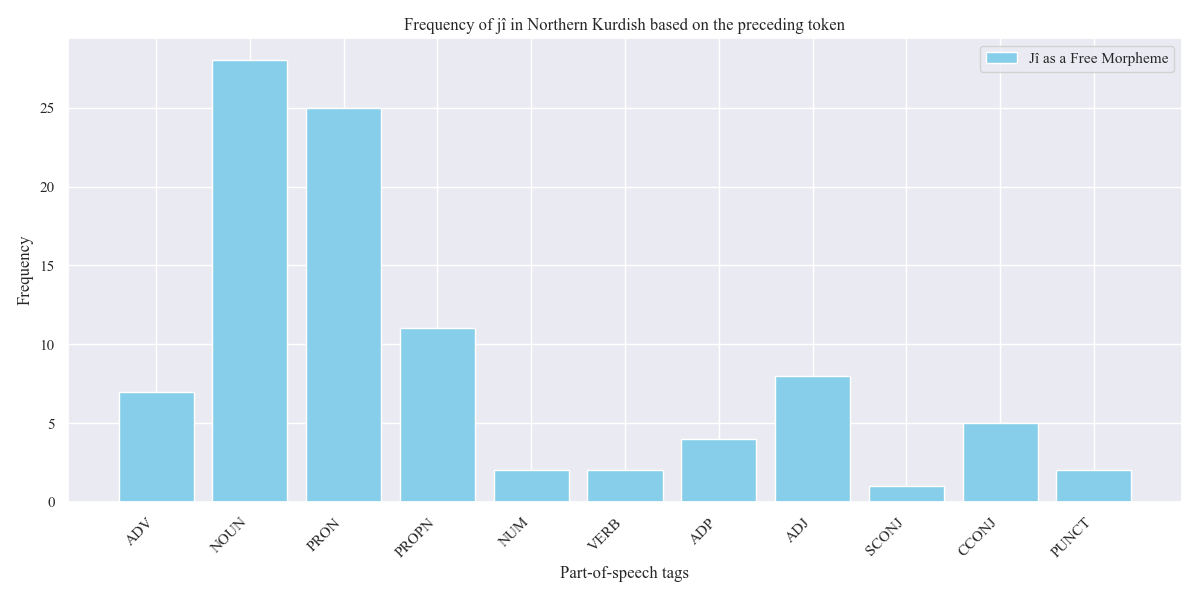

In [32]:
categories = list(previous_free_morpheme.keys())
counts_free_morpheme = [previous_free_morpheme.get(cat, 0) for cat in categories]

fig, ax = plt.subplots(figsize=(12, 6))
bars_free_morpheme = ax.bar(categories, counts_free_morpheme, color='skyblue', label='Jî as a Free Morpheme')

ax.set_title('Frequency of jî in Northern Kurdish based on the preceding token')
ax.set_xlabel('Part-of-speech tags')
ax.set_ylabel('Frequency')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plots/ji_in_Kurmanji.pdf")
plt.show()
